# Face Detection

### Importing Python Librarries

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2

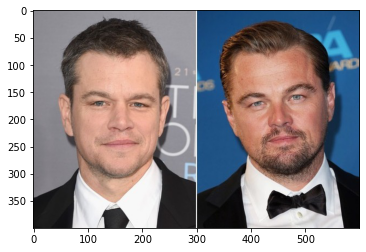

In [4]:
image1 = Image.open("Downloads/sample1.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

## Face Detection


### Detecting the location of faces from a given image using face_recognition library

In [6]:
image = face_recognition.load_image_file("Downloads/sample1.jpg")

face_locations = face_recognition.face_locations(image)

### Taking the first face detected from image and plotting it

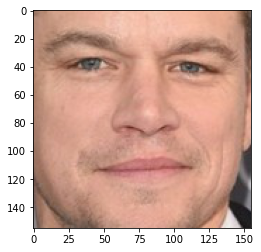

In [7]:
top, right, bottom, left = face_locations[0]
face_image1 = image[top:bottom, left:right]
plt.imshow(face_image1)
image_save = Image.fromarray(face_image1)
image_save.save("image_1.jpg")

### Taking the second face detected from image and plotting it

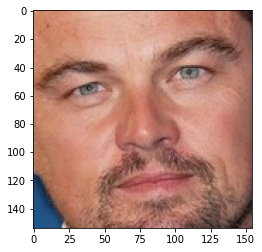

In [8]:
top, right, bottom, left = face_locations[1]
face_image2 = image[top:bottom, left:right]
plt.imshow(face_image2)
image_save = Image.fromarray(face_image2)
image_save.save("image_2.jpg")

## Face Recognition
### Image 1


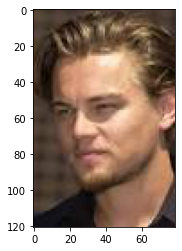

In [9]:
image1 = Image.open("Downloads/index2.jpeg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

### Image 2

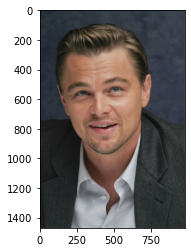

In [10]:
image2 = Image.open("Downloads/index1.jpg")
image_array2 = np.array(image2)
plt.imshow(image_array2)

### Image 3

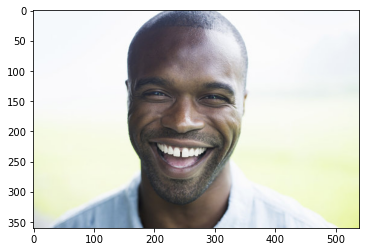

In [12]:
image3 = Image.open("Downloads/testimage1.jpg")
image_array3 = np.array(image3)
plt.imshow(image_array3)

### Comparing Image1 and Image2 which is of same person with different pose to find if they are recognized as same

In [14]:
image1 = face_recognition.load_image_file("Downloads/index1.jpg")
image2 = face_recognition.load_image_file("Downloads/index2.jpeg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image1)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

### The result of the above comparison returns "True" stating that two images having different pose are recognized as same

In [17]:
print(results)

[True]


### Comparing Image1 and Image3 which are the images of two persons and the result returned after comparison is "False" denoting the two images are not recognized as same

In [19]:
image1 = face_recognition.load_image_file("Downloads/index1.jpg")
image2 = face_recognition.load_image_file("Downloads/testimage1.jpg")
 
encoding_1 = face_recognition.face_encodings(image1)[0]

encoding_2 = face_recognition.face_encodings(image2)[0]

results = face_recognition.compare_faces([encoding_1], encoding_2,tolerance=0.50)

In [20]:
print(results)

[False]


## Emotion Detection

In [21]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}


In [22]:
#Reading a sample image

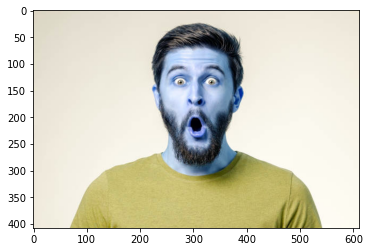

In [23]:
face_image  = cv2.imread("Downloads/testimage.jpg")
plt.imshow(face_image)

In [25]:
print(face_image.shape)


(408, 612, 3)


In [26]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

### Load the model trained for detecting emotions of a face

In [28]:
model = load_model("Downloads/model_v6_23.hdf5")

In [30]:
print (face_image.shape)

(1, 48, 48, 1)


In [31]:
predicted_class = np.argmax(model.predict(face_image))

1/1 [==============================] - 2s 2s/step


In [32]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [33]:
print(predicted_label)

Fear
